In [42]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
sns.set(style="whitegrid")

In [10]:
df = pd.read_csv('kc_house_data_test_features.csv')
df_train = pd.read_csv('kc_house_data_train.csv')


In [11]:
df

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4319,4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4320,4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4321,4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Data Cleaning


In [12]:
## change the date column to the right format-- 
df['date'] = df['date'].str.replace('T000000','')
df.astype({'date' : 'str'}).dtypes
type(df['date'][0])



str

In [13]:
df['yr_renovated'].min()

0

In [14]:
## call the date-time to change the columns to date 
# df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')



In [15]:
df['date'].describe()

count         4323
unique         327
top       20140708
freq            36
Name: date, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 21 columns):
Unnamed: 0       4323 non-null int64
id               4323 non-null int64
date             4323 non-null object
bedrooms         4323 non-null int64
bathrooms        4323 non-null float64
sqft_living      4323 non-null int64
sqft_lot         4323 non-null int64
floors           4323 non-null float64
waterfront       4323 non-null int64
view             4323 non-null int64
condition        4323 non-null int64
grade            4323 non-null int64
sqft_above       4323 non-null int64
sqft_basement    4323 non-null int64
yr_built         4323 non-null int64
yr_renovated     4323 non-null int64
zipcode          4323 non-null int64
lat              4323 non-null float64
long             4323 non-null float64
sqft_living15    4323 non-null int64
sqft_lot15       4323 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 709.4+ KB


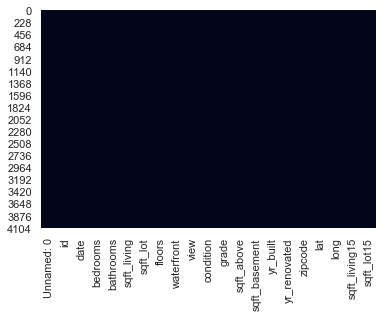

In [17]:
## checking for null values.
sns.heatmap(df.isnull(), cbar=False)


In [18]:
## drop the Unnecessary columns 
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [19]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20140827,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,20150218,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,20141107,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,20141203,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,20150115,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,20140521,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4319,20150223,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4320,20140623,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4321,20150116,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [20]:
df['bedrooms'].max()

10

In [21]:
df['price'].mean()

KeyError: 'price'

In [ ]:
plt.boxplot(df['price'],showmeans=True)

In [ ]:
df.dtypes


In [ ]:
df.waterfront

In [22]:
# Get the categorical data 
df.astype({'waterfront': 'category', 'view' : 'category', 'condition' : 'category', 'grade' : 'category'}).dtypes

date               object
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [23]:
df.waterfront

0       0
1       0
2       0
3       0
4       0
       ..
4318    0
4319    0
4320    0
4321    0
4322    0
Name: waterfront, Length: 4323, dtype: int64

In [24]:
#list of numerical variables
num_vars = [var for var in df.columns if df[var].dtypes != 'O']
print('Number of numerical variables: ', len(num_vars))

Number of numerical variables:  18


In [25]:
# visualise the numerical variables
df[num_vars].head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916


In [ ]:
df['grade'].value_counts()

In [ ]:
cat_vars = ['waterfront', 'view', 'condition', 'grade']

In [5]:
cat_vars

NameError: name 'cat_vars' is not defined

In [ ]:
# Find indices of outliers in price
remove_price = df.index[(df['price'] > 6000000)]
remove_price


In [ ]:

df.drop(remove_price, inplace = True)
df.iloc[remove_price]

In [ ]:
remove_bedroom = df.index[(df['bedrooms'] > 15)]
remove_bedroom





In [ ]:
df.drop(remove_bedroom, inplace = True)
df.iloc[remove_bedroom]

## EDA

In [ ]:
# plot the categorical data to look for insights on data 
for cat in cat_vars:
    plt.bar(x=df[cat], height=df['price'])
    plt.show()

In [ ]:
## 
year_vars = [var for var in num_vars if 'yr' in var or 'Year' in var or 'date' in var]
year_vars

In [ ]:
for var in year_vars:
    print(var, df[var].unique())
    print()


In [ ]:
## plot of the mean house price in comparison to the yr_built 
df.groupby('yr_built')['price'].mean().plot()
plt.ylabel('Mean House Price')
plt.title('Change in House price with the years')

In [ ]:
## 
sns.jointplot(x='age', y='price', data=df, kind="reg")

## Feature Enginerring 

Age feature

In [26]:
df['date'] = df['date'].astype('str')

In [27]:
df['year_sold'] = df['date'].str[0:4]

In [28]:
df['year_sold'] = df['date'].str[0:4]

In [29]:
df['age'] = df['year_sold'] - df['yr_built']

In [30]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age
0,20140827,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,2014,47
1,20150218,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,2015,48
2,20141107,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576,2014,9
3,20141203,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565,2014,38
4,20150115,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,20140521,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
4319,20150223,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,1
4320,20140623,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,5
4321,20150116,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,11


Season Feature

In [31]:
df['month_sold'] = df['date'].str[4:6]

In [32]:
df['month_sold'] = df['month_sold'].astype('int')

In [33]:
df['spring'] = np.where(df['month_sold'].between(3,5), 1, 0)
df['summer'] = np.where(df['month_sold'].between(6,8), 1, 0)
df['fall'] = np.where(df['month_sold'].between(9,11), 1, 0)

In [34]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age,month_sold,spring,summer,fall
0,20140827,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,2014,47,8,0,1,0
1,20150218,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,2015,48,2,0,0,0
2,20141107,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576,2014,9,11,0,0,1
3,20141203,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565,2014,38,12,0,0,0
4,20150115,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916,2015,10,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,20140521,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,5,1,0,0
4319,20150223,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,1,2,0,0,0
4320,20140623,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,5,6,0,1,0
4321,20150116,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,11,1,0,0,0


Dummies

In [35]:
## creating dummy variable for the categorical data
categorical = ['view', 'condition']
dummies1 = pd.get_dummies(df, prefix = categorical, columns = categorical, drop_first = True)


In [36]:
len(dummies1.columns), list(dummies1.columns)

(31,
 ['date',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15',
  'year_sold',
  'age',
  'month_sold',
  'spring',
  'summer',
  'fall',
  'view_1',
  'view_2',
  'view_3',
  'view_4',
  'condition_2',
  'condition_3',
  'condition_4',
  'condition_5'])

In [37]:
dummies1.drop('date' , inplace = True ,axis =1)


In [38]:
my_dummy = list(dummies1.columns)

In [39]:
my_dummy.remove('price')

ValueError: list.remove(x): x not in list

In [40]:
my_dummy.remove('date')

ValueError: list.remove(x): x not in list

In [41]:
my_dummy

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year_sold',
 'age',
 'month_sold',
 'spring',
 'summer',
 'fall',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5']

In [ ]:
my_vars = '+'.join(my_dummy)
my_vars

In [ ]:
depen_var = 'price'


In [ ]:
from statsmodels.formula.api import ols

In [ ]:
lr_model = ols(formula= depen_var+'~'+my_vars,data=dummies1).fit()

In [ ]:
lr1_model = ols(formula= depen_var+'~'+my_vars,data=dummies1).fit()

In [ ]:
lr_model.summary()

In [ ]:
my_dummy

Lasso

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(dummies1,df.price, test_size = 0.2,random_state = 0)

In [ ]:
lasso_01 = Lasso(alpha=0.1)
lasso_01.fit(X_train, y_train)


In [ ]:
y_predict = lasso_01.predict(df)


In [ ]:
my_rsme = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print(my_rsme)
print(my_rsme/y_test.std())